In [1]:
import sys
sys.path.append('/home/yuncong/project/caffe/python')

In [2]:
import caffe

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
caffe_root = '/home/yuncong/project/caffe/'

In [6]:
MODEL_FILE = caffe_root + 'models/bvlc_reference_caffenet/deploy.prototxt'
PRETRAINED = caffe_root + 'models/bvlc_reference_caffenet/bvlc_reference_caffenet.caffemodel'
IMAGE_FILE = caffe_root + 'examples/images/cat.jpg'

In [7]:
import os
if not os.path.isfile(PRETRAINED):
    print("Downloading pre-trained CaffeNet model...")
    !/home/yuncong/project/caffe/scripts/download_model_binary.py /home/yuncong/project/caffe/models/bvlc_reference_caffenet

In [8]:
caffe.set_mode_cpu()
net = caffe.Classifier(MODEL_FILE, PRETRAINED,
                       mean=np.load(caffe_root + 'python/caffe/imagenet/ilsvrc_2012_mean.npy').mean(1).mean(1),
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(256, 256))

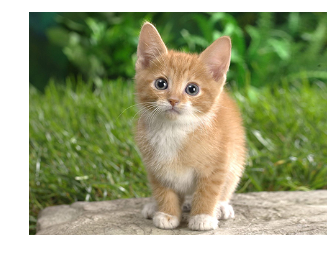

In [12]:
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image);
plt.axis('off');

prediction shape: (1000,)
predicted class: 281


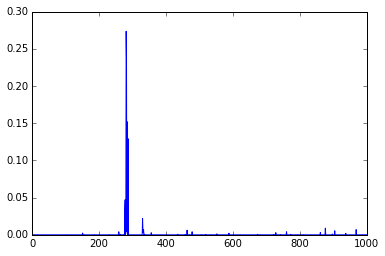

In [13]:
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
print 'prediction shape:', prediction[0].shape
plt.plot(prediction[0])
print 'predicted class:', prediction[0].argmax()

prediction shape: (1000,)
predicted class: 281


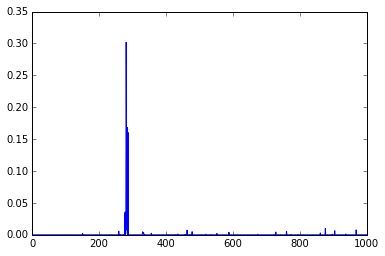

In [14]:
prediction = net.predict([input_image], oversample=False)
print 'prediction shape:', prediction[0].shape
plt.plot(prediction[0])
print 'predicted class:', prediction[0].argmax()